In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

np.random.seed(0)

In [2]:
def get_pos_vel(itime):
    """속도와 위치값 반환"""
    v = np.random.normal(0, np.sqrt(10)) # v : 측정 잡음
    
    vel_true = 80 # 속도를 80[m/s]이며, 잡음이 없다고 가정
    pos_true = vel_true * (itime*dt) # 위치추정값
    z_vel_meas = vel_true + v # 속도 추정
    
    return z_vel_meas, pos_true

In [3]:
def kalman_filter(z_meas, x_esti, P):
    """칼만 필터 알고리즘"""
    # (1) 예측
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q
    
    # (2) 칼만 이득
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)
    
    # (3) 추정
    x_esti = x_pred + K @ (z_meas - H @ x_pred)
    
    # (4) 오차 공분산
    P = P_pred - K @ H @ P_pred
    
    return x_esti, P

In [4]:
# Input parameters.
time_end = 4
dt = 0.1

In [5]:
# 시스템 모델을 위한 초기값 설정.
# 행렬: A, H, Q, R, P_0
# 벡터: x_0
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[0, 1]])
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])

# 추정을 위한 초기값 설정.
x_0 = np.array([0, 20])  # 위치 및 속도
P_0 = 5 * np.eye(2)

In [6]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
vel_meas_save = np.zeros(n_samples)
pos_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)

In [7]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas, pos_true = get_pos_vel(i)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    vel_meas_save[i] = z_meas
    pos_true_save[i] = pos_true
    pos_esti_save[i] = x_esti[0]
    vel_esti_save[i] = x_esti[1]

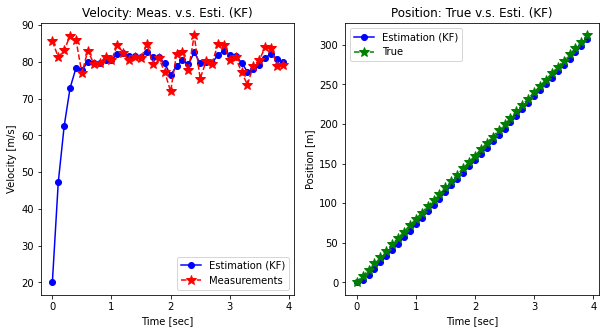

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(time, vel_esti_save, 'bo-', label='Estimation (KF)')
plt.plot(time, vel_meas_save, 'r*--', label='Measurements', markersize=10)
plt.legend(loc='lower right')
plt.title('Velocity: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')

plt.subplot(1, 2, 2)
plt.plot(time, pos_esti_save, 'bo-', label='Estimation (KF)')
plt.plot(time, pos_true_save, 'g*--', label='True', markersize=10)
plt.legend(loc='upper left')
plt.title('Position: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')
plt.savefig('jpg/vel2pos_kf.jpg')
plt.show()